In [2]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

import numpy as np
from draco.core import containers
from ch_util import ephemeris
from ch_util import tools
from astropy import constants as const
from pathlib import Path
import h5py


In [4]:
## data path

## delay power spec data #
data_path = Path(f"/scratch/arnab92/chime/relaxed/ra_110_265_deg/data/dspec")
data_dspec = "delay_spectrum_ra_110deg_265deg_deconvolve_psbeam_all.h5"

## delay spec data #

data_delayspec_path = Path("/home/arnab92/projects/rpp-chime/arnab92/tmp/data/dspec")
data_delayspec = "delay_spectrum_ra_110deg_265deg_wiener_filtered.h5"



In [5]:
## Read the nose delay spec ##
noise_delayspec_path = Path(f"/home/arnab92/projects/rpp-chime/arnab92/tmp/noise/dspec")
noise_delayspec = "delay_spectrum_ra_110deg_265deg_wiener_filtered.h5"

## Read the nose delay power spec ##
noise_dspec_path = Path(f"/scratch/arnab92/chime/relaxed/ra_110_265_deg/noise/dspec")
noise_dspec = "delay_spectrum_ra_110deg_265deg_deconvolve_psbeam_all_noise.h5"


In [6]:
## Read  the delay power spectrum of DATA ##
delaymap = containers.DelaySpectrum.from_file(data_path/data_dspec)
delaymap.attrs["baseline_axes"]

array(['beam', 'pol', 'el'], dtype=object)

In [7]:
## Read  the delay power spectrum of Noise ##
delaymap_noise = containers.DelaySpectrum.from_file(noise_dspec_path/noise_dspec)
delaymap_noise.attrs["baseline_axes"]

array(['beam', 'pol', 'el'], dtype=object)

In [8]:
## Read the delay spectrum of data

delayspec_map = containers.delayspec.from_file(data_delayspec_path/data_delayspec)
delayspec_map.attrs["baseline_axes"]

array(['beam', 'pol', 'ra', 'el'], dtype=object)

In [9]:
## Read the delay spectrum of noise

delayspec_noise_map = containers.delayspec.from_file(noise_delayspec_path/noise_delayspec)
delayspec_noise_map.attrs["baseline_axes"]

array(['beam', 'pol', 'ra', 'el'], dtype=object)

In [10]:
tau = delayspec_map.index_map['delay'][:] * 1e3
el = delayspec_map.index_map['el']
pol = delayspec_map.index_map['pol'][:]
ra = delayspec_map.index_map['ra']
nel = el.size
npol = pol.size
ntau = tau.size
nRA = ra.size
print(f'Length of the baseline (dec):{nel}, RA: {nRA}, Pol length: {npol}, length of delay: {ntau}')

Lat,Lon = tools._LAT_LON["chime"]
print(f'Lat : {Lat}, Long : {Lon}')

def sza2dec(sza):
    return tools._LAT_LON["chime"][0] + np.degrees(np.arcsin(sza))

DEC = sza2dec(el) # sine(ZA) to DEC conversion (ZA span is same for both DATA and HI map)


Length of the baseline (dec):1217, RA: 1728, Pol length: 2, length of delay: 1088
Lat : 49.3207125, Long : -119.62367


In [11]:
## Storing the delay power spectrum of data  and noise as (npol,nDEC,ndelay)
shp = (1,npol,nel)
dspec = delaymap.spectrum[:].reshape(shp + (-1,))[0, :]
dspec_N = delaymap_noise.spectrum[:].reshape(shp + (-1,))[0, :]

In [12]:
## Storing the delay spectrum of data and noise as (npol,nRA,nDEC,ndelay)

shp = (1,npol,nel,nRA)
ds_spectrum = delayspec_map.spectrum[:].reshape(shp + (-1,))[0, :]
ds_noise_spectrum = delayspec_noise_map.spectrum[:].reshape(shp + (-1,))[0, :]

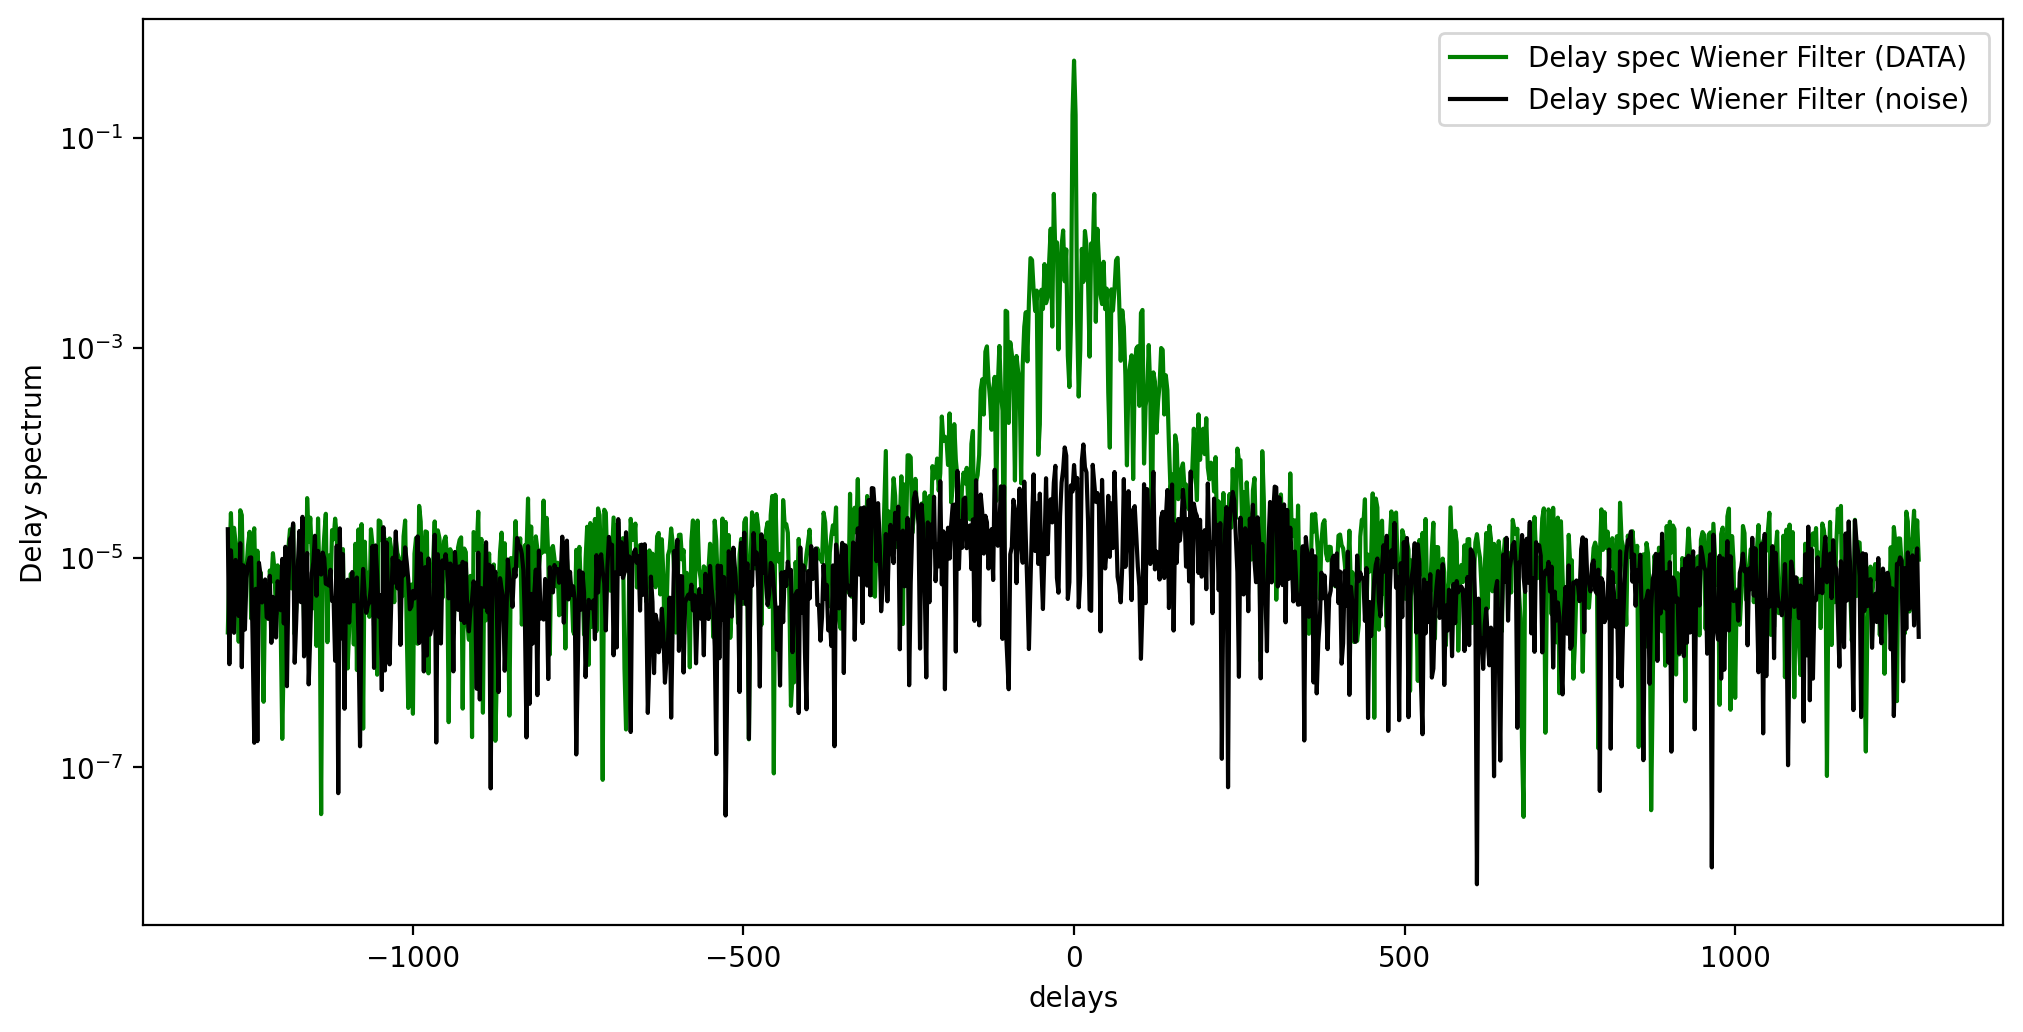

In [13]:
pol_idx = 0
dec_idx = 750
ra_idx = 550
fig = plt.figure(figsize=(12,6),dpi=100)

plt.plot(tau,ds_spectrum[pol_idx,dec_idx,ra_idx,:],color='green',label='Delay spec Wiener Filter (DATA)')
plt.plot(tau,ds_noise_spectrum[pol_idx,dec_idx,ra_idx,:],color='black',label='Delay spec Wiener Filter (noise) ')

plt.legend()
plt.xlabel('delays')
plt.ylabel('Delay spectrum')
plt.yscale('log')

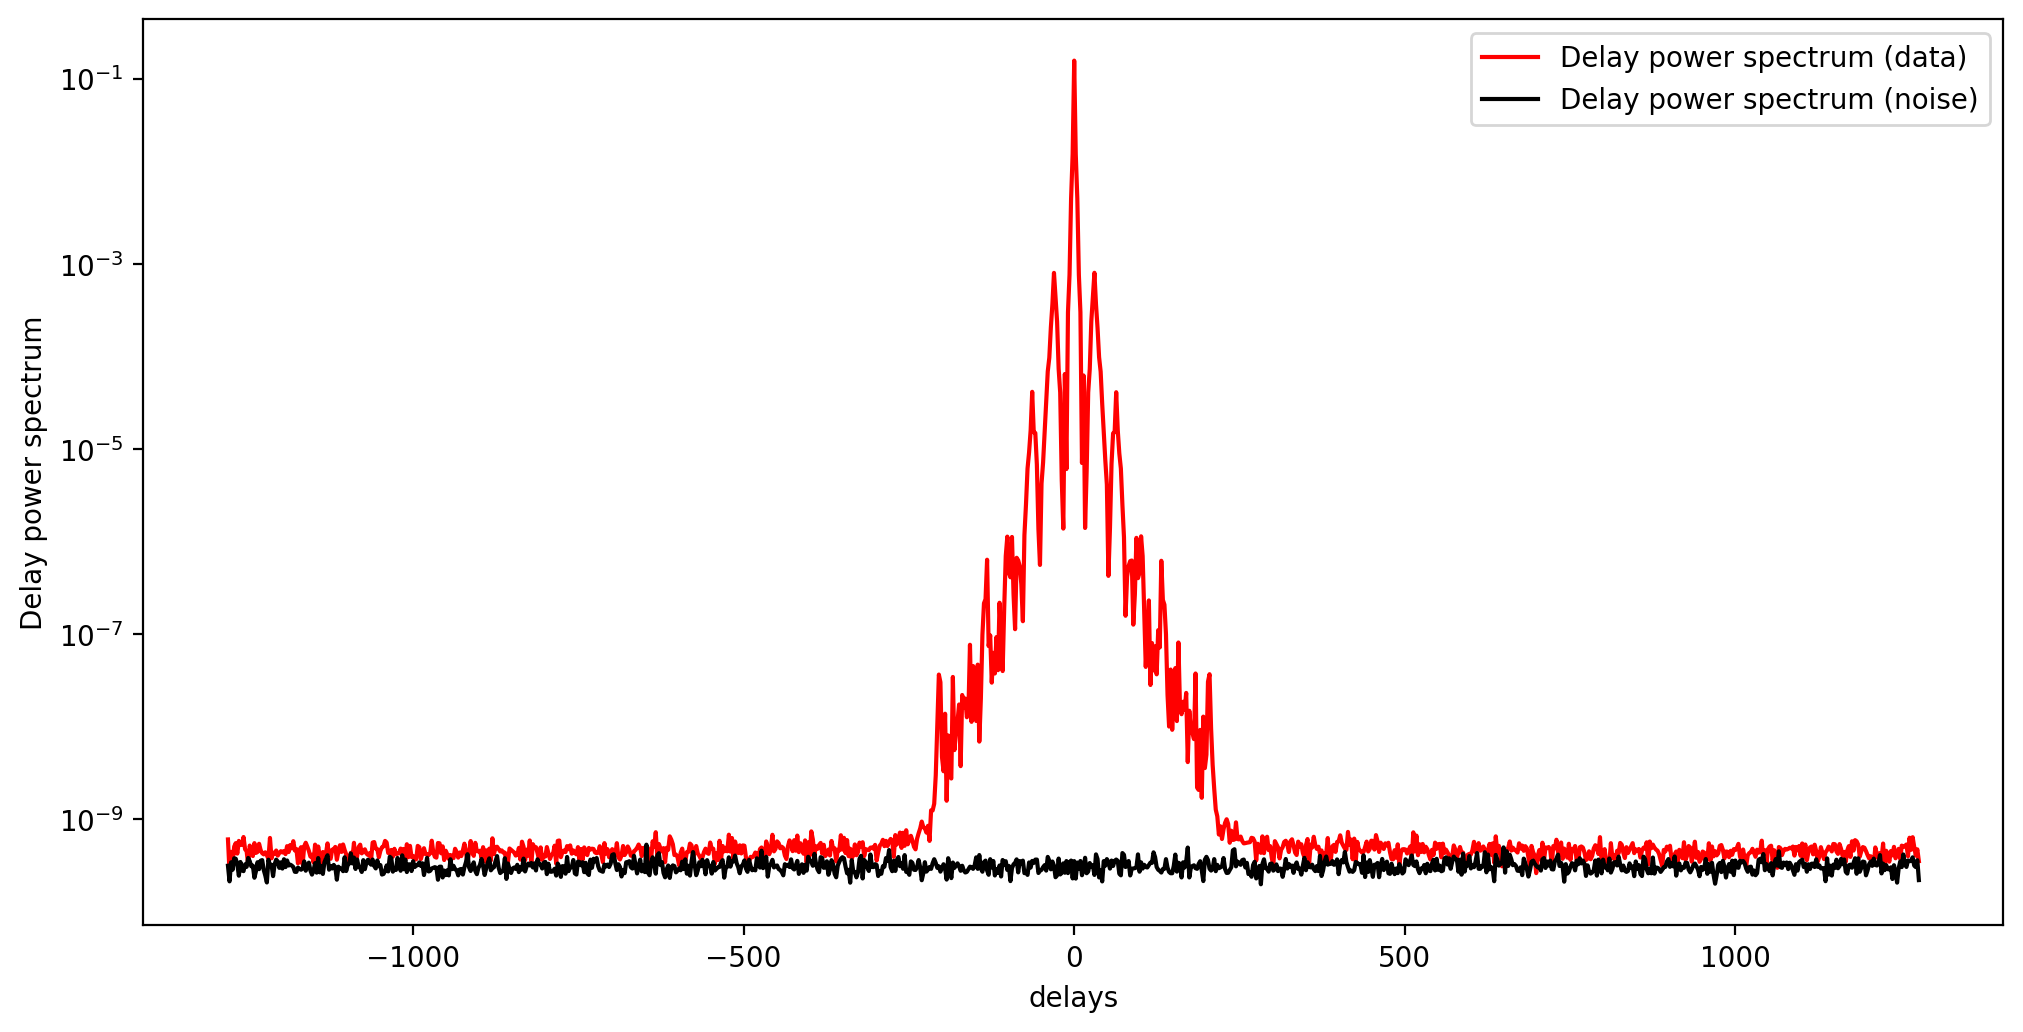

In [14]:
pol_idx = 0
dec_idx = 750

fig = plt.figure(figsize=(12,6),dpi=100)

plt.plot(tau,dspec[pol_idx,dec_idx,:],color='red',label='Delay power spectrum (data)')
plt.plot(tau,dspec_N[pol_idx,dec_idx,:],color='black',label='Delay power spectrum (noise)')
plt.legend()
plt.xlabel('delays')
plt.ylabel('Delay power spectrum')
plt.yscale('log')